# ISYS2407 Information Systems Solutions & Design
## Assignment 3
## Feature Selection
### Student name: Muhammad Ali Syed
### Student number: s3640387

# Import libraries 

In [1]:
import pandas as pd
import numpy as np

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Libraries to select k best features
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

## Load the data set

In [2]:
passengerSatisfaction_df = pd.read_csv('passenger-satisfaction.csv')  

# Check
passengerSatisfaction_df.head()

,id,gender,customer_type,age,type_of_travel,class,flight_distance,inflight_wifi_service,convenient_departure_arrival_time,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay(mins),arrival_delay(mins),satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,0
1,5047,Male,Disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,0
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1


### Split the data into training and testing sets 

In [3]:
# Features are variables that affect the target/label
# So, it's all the columns excluding the target column
# However, you may also use a subset of features previously identified as best features
# You might want to experiment with both the full set and the best features
feature_cols = [
    'age', 
    'flight_distance', 
    'inflight_wifi_service', 
    'convenient_departure_arrival_time',
    'ease_of_online_booking', 
    'gate_location', 
    'food_and_drink', 
    'online_boarding',
    'seat_comfort',
    'inflight_entertainment',
    'onboard_service',
    'leg_room_service',
    'baggage_handling',
    'checkin_service'
    
]

X = passengerSatisfaction_df[feature_cols]
# print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = passengerSatisfaction_df['gender']
# print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, # keep 30% for testing
                                                    random_state=2) # pass an int for reproducible rtesult)

In [4]:
print("X Train Data Set\n",X_train)
print("X Test Data Set\n",X_test)

X Train Data Set
         age  flight_distance  inflight_wifi_service  \
58712    24              283                      3   
78436    22             1598                      2   
71500    52             3965                      3   
68106    30             2865                      1   
25689    40              368                      3   
...     ...              ...                    ...   
44566    36              738                      2   
95816    47              406                      2   
72173    51             1120                      3   
100879   58              235                      2   
89256    21              447                      4   

        convenient_departure_arrival_time  ease_of_online_booking  \
58712                                   0                       3   
78436                                   1                       2   
71500                                   4                       2   
68106                                   1    

In [5]:
print("Y Train Data Set\n",y_train)
print("Y Test Data Set\n",y_test)

Y Train Data Set
 58712       Male
78436       Male
71500       Male
68106     Female
25689       Male
           ...  
44566       Male
95816       Male
72173     Female
100879      Male
89256       Male
Name: gender, Length: 72732, dtype: object
Y Test Data Set
 18981     Female
4555        Male
44022       Male
84411     Female
91989       Male
           ...  
2620        Male
21396       Male
94078       Male
10550     Female
101352    Female
Name: gender, Length: 31172, dtype: object


# KNN

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate model and fit on training data
knn_model = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)

# Predict using test data
y_pred = knn_model.predict(X_test)

# Quick check
print(y_pred[:5])

['Female' 'Female' 'Male' 'Male' 'Male']


## Confusion Matrix and accuracy 

In [7]:
from sklearn.metrics import confusion_matrix
con_mat = confusion_matrix(y_test, y_pred, ["Male", "Female"])
import math
total_accuracy = (con_mat[0, 0] + con_mat[1, 1]) / float(np.sum(con_mat))
class1_accuracy = (con_mat[0, 0] / float(np.sum(con_mat[0, :])))
class2_accuracy = (con_mat[1, 1] / float(np.sum(con_mat[1, :])))
print(con_mat)
print('Total accuracy: %.5f' % total_accuracy)
print('Class1 accuracy: %.5f' % class1_accuracy)
print('Class2 accuracy: %.5f' % class2_accuracy)
print('Geometric mean accuracy: %.5f' % math.sqrt((class1_accuracy * class2_accuracy)))

C:\Users\Naveed\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=['Male', 'Female'] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


[[7735 7595]
 [7350 8492]]
Total accuracy: 0.52056
Class1 accuracy: 0.50457
Class2 accuracy: 0.53604
Geometric mean accuracy: 0.52007


### plot confusion matrix 

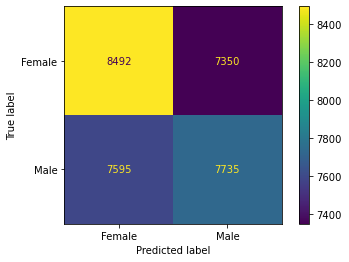

In [8]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn_model, X_test, y_test)